In [69]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def cookie_broken(imgname):
    
    img = cv.imread(imgname, 1) 
    scaled_cookie = cv.resize(img, (255,255)) #scale image
    
    #using grabcut to get the mask of where the foreground is
    mask = np.zeros(scaled_cookie.shape[:2], np.uint8)

    bgmodel = np.zeros((1,65), np.float64)
    fgmodel = np.zeros((1,65), np.float64)

    #only the edges(20 px) will def be the background 
    rectangle = (20, 20, 234, 234) 

    cv.grabCut(scaled_cookie, mask, rectangle, bgmodel, fgmodel, 18, cv.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 
    
    #removing any background noise
    kernel = np.ones((5,5))/25
    dst = cv.filter2D(mask2,-1,kernel)
    
    #searching the masks for any gaps
    i = 20     #start searching from 20th row

    broken = False
    start_row = 0    #to keep track of the top edge of the cookie

    while i < 225:   #no need to search last 30 px

        left = 0
        right = 0

        for j in range(20,235):    #find the first non-zero pixel from left
            if(dst[i,j] != 0):
                left = j
                break

        for j in range(254,20,-1):    #find the last non-zero pixel
            if(dst[i,j] != 0):
                right = j
                break

        if(left != right and right-left > 5):  #to catch crumbs

            if(start_row == 0):   #reached the top edge
                start_row = i
                i += 10     #start searching after 10px b/c edges of cookie may not be perfectly curved

            else:
                for j in range(left, right):   #searching for any gaps
                    if(dst[i, j] != 1):
                        broken = True
                        i = 225  #break from the outer while loop 

        i += 1
        
    return broken

In [71]:
imgname = 'cookies/cookie2.jpg' #unbroken cookie

In [72]:
cookie_broken(imgname)

False

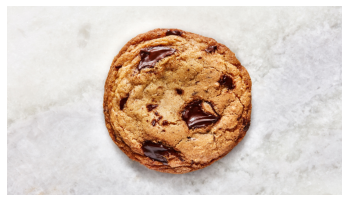

In [76]:
img = cv.imread(imgname, 1)
#here is the image we tested on.. it is indeed not broken!
plt.axis("off")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [83]:
cookie_broken('cookies/b-cookie1.jpg') #a broken cookie


True

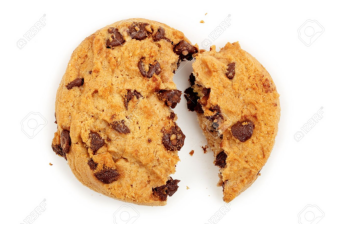

In [84]:
img2 = cv.imread('cookies/b-cookie1.jpg')
#its a broken cookie!
plt.axis("off")
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()